In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
btc_5 = pd.read_csv ('./btc_5.csv', encoding='unicode_escape')

In [41]:
btc_5['time'] = btc_5['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_5['time'] = pd.to_datetime(btc_5["time"])
btc_5.set_index("time", inplace = True)
#btc_5 = btc_5.reindex(pd.date_range(start=btc_5.index.min(), end=btc_5.index.max(), freq='5m'))

In [45]:
btc_5.head()

,open,high,low,close,EMA 1 (8),EMA 2 (21),EMA 3 (34),EMA 4 (55),EMA 5 (100),Upper ATR 3,Lower ATR 3,RSI Stoch,RSI
time,,,,,,,,,,,,,
2022-10-18 00:00:00,19510.5,19568.0,19508.5,19554.0,19520.56932,19515.29693,19513.27278,19509.76556,19492.96465,19577.86557,19452.72830,82.851816,60.408760
2022-10-18 00:05:00,19554.0,19611.5,19551.0,19588.0,19535.55391,19521.90630,19517.54291,19512.55964,19494.84654,19592.97004,19450.84257,84.940642,66.402319
2022-10-18 00:10:00,19588.0,19602.0,19568.5,19568.5,19542.87526,19526.14209,19520.45474,19514.55751,19496.30502,19599.30842,19452.97577,92.790292,60.724399
2022-10-18 00:15:00,19568.5,19616.5,19568.5,19605.0,19556.68076,19533.31099,19525.28590,19517.78760,19498.45740,19611.53687,19455.08512,92.790292,66.498827
2022-10-18 00:20:00,19605.0,19605.0,19579.0,19581.0,19562.08504,19537.64636,19528.46956,19520.04519,19500.09191,19615.85610,19459.43662,84.242746,60.228486


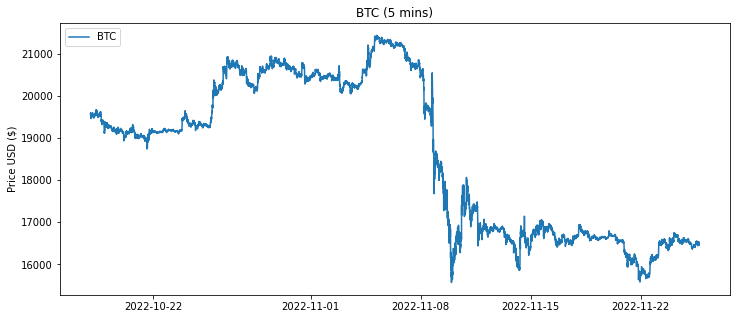

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(btc_5['close'], label='BTC')
plt.title('BTC (5 mins)')
plt.ylabel("Price USD ($)")
plt.legend(loc="upper left")
plt.show()

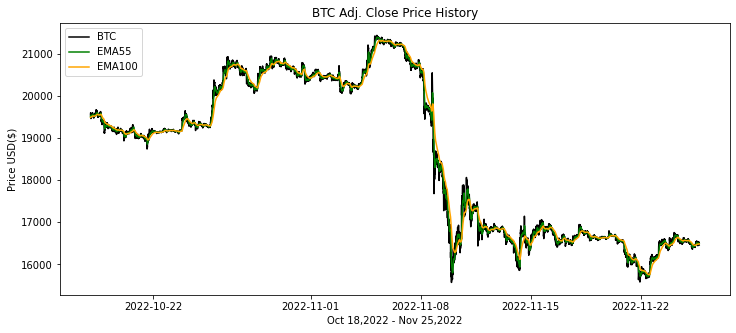

In [49]:
plt.figure(figsize=(12,5))
plt.plot(btc_5['close'], label='BTC', color = "black")
plt.plot(btc_5['EMA 2 (21)'], label='EMA55', color = "green")
plt.plot(btc_5['EMA 5 (100)'], label='EMA100', color = "orange")
plt.title("BTC Adj. Close Price History")
plt.xlabel("Oct 18,2022 - Nov 25,2022")
plt.ylabel('Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [50]:
def buySell(btc_5):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_5)):
    if btc_5 ['EMA 4 (55)'][i] > btc_5['EMA 5 (100)'][i]:
      if flag != 1:
        sigPriceBuy.append(btc_5['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif btc_5['EMA 4 (55)'][i] < btc_5['EMA 5 (100)'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_5['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [51]:
buySell = buySell(btc_5)
btc_5['Buy Signal Price'] = buySell[0]
btc_5['Sell Signal Price'] = buySell[1]
# To show the data
btc_5

,open,high,low,close,EMA 1 (8),EMA 2 (21),EMA 3 (34),EMA 4 (55),EMA 5 (100),Upper ATR 3,Lower ATR 3,RSI Stoch,RSI,Buy Signal Price,Sell Signal Price
time,,,,,,,,,,,,,,,
2022-10-18 00:00:00,19510.5,19568.0,19508.5,19554.0,19520.56932,19515.29693,19513.27278,19509.76556,19492.96465,19577.86557,19452.72830,82.851816,60.408760,19554.0,NaN
2022-10-18 00:05:00,19554.0,19611.5,19551.0,19588.0,19535.55391,19521.90630,19517.54291,19512.55964,19494.84654,19592.97004,19450.84257,84.940642,66.402319,NaN,NaN
2022-10-18 00:10:00,19588.0,19602.0,19568.5,19568.5,19542.87526,19526.14209,19520.45474,19514.55751,19496.30502,19599.30842,19452.97577,92.790292,60.724399,NaN,NaN
2022-10-18 00:15:00,19568.5,19616.5,19568.5,19605.0,19556.68076,19533.31099,19525.28590,19517.78760,19498.45740,19611.53687,19455.08512,92.790292,66.498827,NaN,NaN
2022-10-18 00:20:00,19605.0,19605.0,19579.0,19581.0,19562.08504,19537.64636,19528.46956,19520.04519,19500.09191,19615.85610,19459.43662,84.242746,60.228486,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25 17:00:00,16502.5,16504.5,16495.0,16498.0,16502.23242,16501.36520,16498.38915,16493.42383,16486.26244,16562.52161,16440.20879,28.776301,49.389413,NaN,NaN
2022-11-25 17:05:00,16498.0,16501.5,16488.5,16491.5,16499.84743,16500.46837,16497.99549,16493.35512,16486.36615,16560.04217,16440.89456,26.037961,47.465441,NaN,NaN
2022-11-25 17:10:00,16491.5,16491.5,16478.5,16479.5,16495.32578,16498.56215,16496.93860,16492.86030,16486.23019,16556.66640,16440.45790,16.398228,44.053526,NaN,NaN


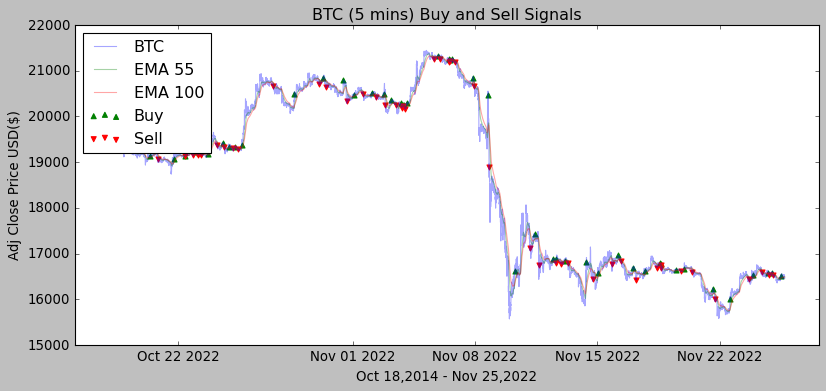

In [52]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_5['close'], label='BTC', alpha=0.35)
plt.plot(btc_5['EMA 4 (55)'], label='EMA 55', alpha=0.35)
plt.plot(btc_5['EMA 5 (100)'],label='EMA 100', alpha=0.35)
plt.scatter(btc_5.index, btc_5['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(btc_5.index, btc_5['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('BTC (5 mins) Buy and Sell Signals')
plt.xlabel("Oct 18,2014 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()